In [1]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
import seaborn as sns

In [4]:
# loading dateset
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
# Checking loaded data
print('Total number of Images in the Dataset:', len(x_train) + len(x_test))
print('Number of train images:', len(x_train))
print('Number of test images:', len(x_test))
print('Shape of training dataset:',x_train.shape)
print('Shape of testing dataset:',x_test.shape)

Total number of Images in the Dataset: 60000
Number of train images: 50000
Number of test images: 10000
Shape of training dataset: (50000, 32, 32, 3)
Shape of testing dataset: (10000, 32, 32, 3)


In [6]:
def showImages(num_row,num_col,X,Y):
    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return

In [7]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

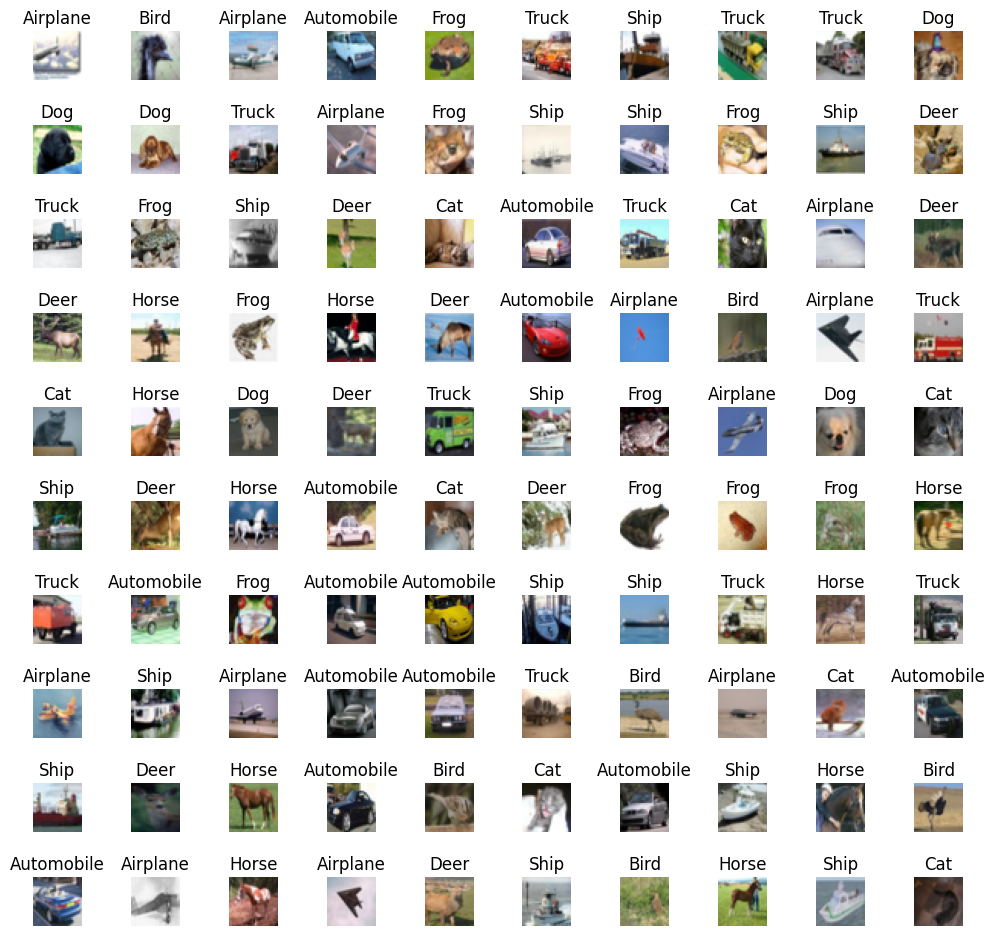

In [8]:
num_row = 10
num_col = 10
showImages(num_row,num_col,X =x_train,Y = y_train)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/ 255
x_test = x_test/255

In [10]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10) #as classes = 10
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [11]:
print('The one hot label is: ', y_train_one_hot[5])
print(y_train_one_hot.shape)

The one hot label is:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
(50000, 10)


# Building Vanila CNN

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [13]:
#Building model computational graph
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.8))
model.add(Dense(10, activation = 'softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

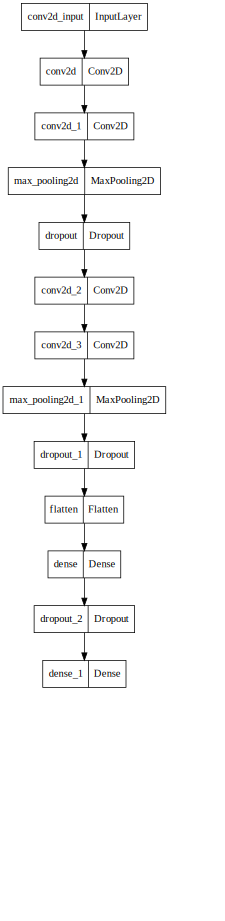

In [15]:
#flow chart of the model

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [16]:
#compiling model with loss, opt, metrics
loss = 'categorical_crossentropy'
opt = tf.keras.optimizers.Adam(learning_rate=0.0009,beta_1=0.9, beta_2=0.999,epsilon=1e-07)
metrics = ['accuracy']

In [17]:
model.compile(loss = loss, optimizer = opt, metrics = metrics)

In [18]:
hist = model.fit(x_train, y_train_one_hot, batch_size = 64 , epochs = 200, validation_split = 0.2)

Epoch 1/200
625/625 [==============================] - 13s 10ms/step - loss: 1.7817 - accuracy: 0.3379 - val_loss: 1.3788 - val_accuracy: 0.4972
Epoch 2/200
625/625 [==============================] - 5s 9ms/step - loss: 1.3871 - accuracy: 0.4948 - val_loss: 1.1768 - val_accuracy: 0.5914
Epoch 3/200
625/625 [==============================] - 6s 9ms/step - loss: 1.2298 - accuracy: 0.5605 - val_loss: 1.0280 - val_accuracy: 0.6348
Epoch 4/200
625/625 [==============================] - 5s 8ms/step - loss: 1.1281 - accuracy: 0.5975 - val_loss: 0.9403 - val_accuracy: 0.6680
Epoch 5/200
625/625 [==============================] - 6s 9ms/step - loss: 1.0606 - accuracy: 0.6217 - val_loss: 0.8787 - val_accuracy: 0.6937
Epoch 6/200
625/625 [==============================] - 5s 9ms/step - loss: 0.9998 - accuracy: 0.6465 - val_loss: 0.8494 - val_accuracy: 0.6998
Epoch 7/200
625/625 [==============================] - 5s 9ms/step - loss: 0.9665 - accuracy: 0.6621 - val_loss: 0.8026 - val_accuracy: 0.71

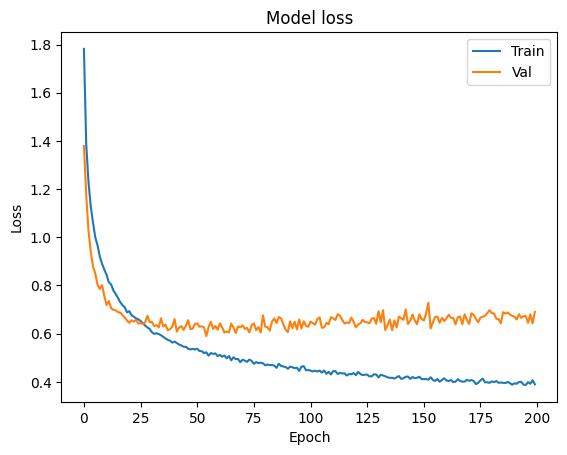

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

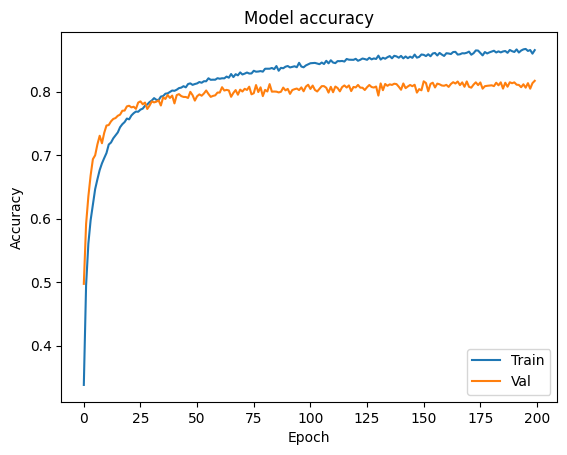

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [21]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 2s 5ms/step - loss: 0.7110 - accuracy: 0.8091


0.8090999722480774

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [24]:
model.save('/content/drive/MyDrive/INTERNSHIP/TechnoHack/image classification/vanila_model')

## Classifying the image


In [25]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [26]:
# Load the saved model
saved_model_path = '/content/drive/MyDrive/INTERNSHIP/TechnoHack/image classification/vanila_model'
loaded_model = load_model(saved_model_path)

In [98]:
image_path = '/content/drive/MyDrive/INTERNSHIP/TechnoHack/image classification/airoplane1.jpg'
img = image.load_img(image_path, target_size=(32, 32))  # Resize to CIFAR-10 image size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
#preprocessed_img_array = preprocess_input(img_array)

In [99]:
# Make predictions
predictions = loaded_model.predict(img_array)

1/1 [==============================] - 0s 30ms/step


In [100]:
predictions

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [101]:

# Convert predictions to class labels
cifar10_class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


In [102]:
# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

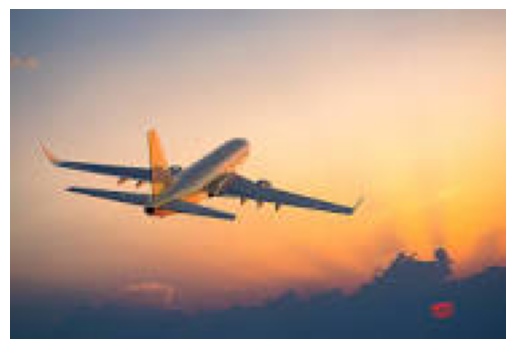

Predicted class: Airplane


In [103]:
# Get the predicted class label
predicted_class_label = cifar10_class_names[predicted_class_index]
# Open the image using PIL
img = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print("Predicted class:", predicted_class_label)